In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [2]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()
print(X_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [3]:
X_train_scaled = np.array(X_train) / 255
X_test_scaled = np.array(X_test) / 255

In [4]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(y_train.reshape(-1,1))
y_train = encoder.transform(y_train.reshape(-1,1)).toarray()
y_test = encoder.transform(y_test.reshape(-1,1)).toarray()

In [5]:
from tensorflow.python.ops.gen_nn_ops import data_format_dim_map_eager_fallback
inp = Input(shape = (28, 28, 1))
cnn = Conv2D(filters = 8, kernel_size = 3, activation='relu')(inp)
pooling = MaxPooling2D(pool_size=(2,2))(cnn)
drop = Dropout(0.2)(pooling)

cnn = Conv2D(filters=32, kernel_size = 4, activation='relu')(drop)
pooling = MaxPooling2D(pool_size=(2,2))(cnn)

f = Flatten()(pooling)

fc1 = Dense(units=32, activation='relu')(f)
fc2 = Dense(units=32, activation='relu') (fc1)
# them vao mo hinh (Act2)
fc3 = Dense(units=16, activation= 'relu')(fc2)
fc4 = Dense(units=8,  activation= 'relu') (fc3)
out = Dense(units=10, activation='softmax') (fc4)

model = Model(inputs = inp, outputs = out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                         

In [6]:
optimizer1 = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer1, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,batch_size=64,epochs=50,
                    validation_data=(X_test_scaled,y_test))

Epoch 1/50
938/938 [==============================] - 21s 7ms/step - loss: 0.6709 - accuracy: 0.7643 - val_loss: 0.1423 - val_accuracy: 0.9593
Epoch 2/50
938/938 [==============================] - 5s 5ms/step - loss: 0.1379 - accuracy: 0.9596 - val_loss: 0.0869 - val_accuracy: 0.9753
Epoch 3/50
938/938 [==============================] - 5s 6ms/step - loss: 0.0978 - accuracy: 0.9718 - val_loss: 0.0552 - val_accuracy: 0.9815
Epoch 4/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0733 - accuracy: 0.9782 - val_loss: 0.0465 - val_accuracy: 0.9856
Epoch 5/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0632 - accuracy: 0.9815 - val_loss: 0.0433 - val_accuracy: 0.9855
Epoch 6/50
938/938 [==============================] - 5s 6ms/step - loss: 0.0531 - accuracy: 0.9840 - val_loss: 0.0399 - val_accuracy: 0.9870
Epoch 7/50
938/938 [==============================] - 5s 5ms/step - loss: 0.0468 - accuracy: 0.9861 - val_loss: 0.0376 - val_accuracy: 0.9877
Epoch

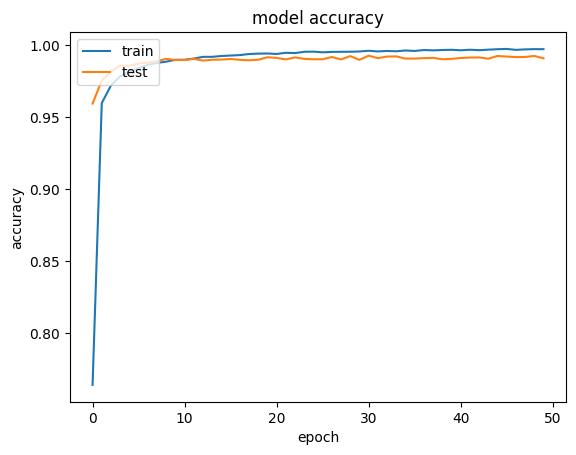

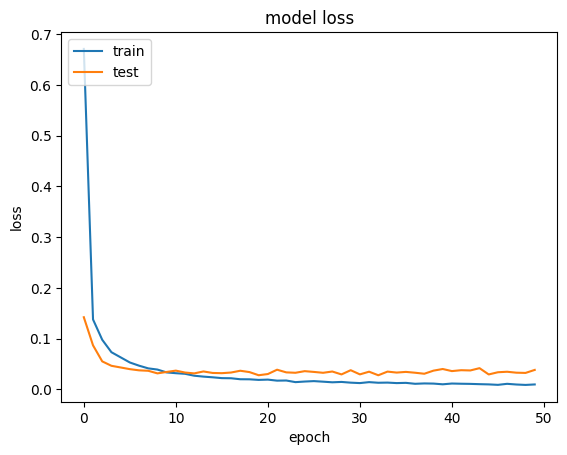

In [7]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [8]:
model.save('model1.h5')

In [9]:
from tensorflow.keras.models import load_model
model1 = load_model('/content/model1.h5')

(290, 296, 3)


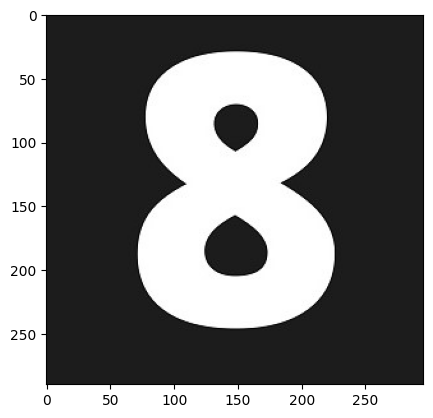

In [11]:
import cv2
img = cv2.imread('/content/so8.jpg')
print(img.shape)
plt.imshow(img)


(290, 296)


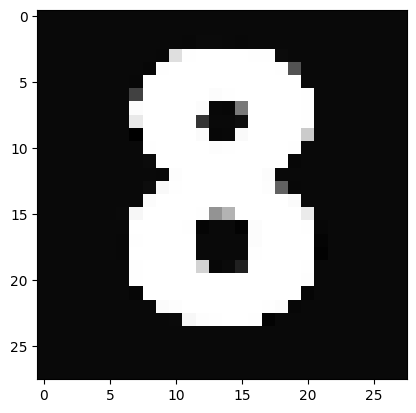

In [12]:
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_new = cv2.resize(gray_img, (28,28))
print(gray_img.shape)
plt.imshow(img_new,cmap = 'gray')

In [13]:
img_scaled = np.array([img_new/255])
print(img_scaled.shape)
y_hat = model1.predict(img_scaled)
print(y_hat)
print(np.argmax(y_hat))

(1, 28, 28)
1/1 [==============================] - 0s 157ms/step
[[1.5067636e-08 8.1096705e-06 2.5381021e-05 3.9928542e-05 3.4517267e-05
  2.2914168e-05 4.0027364e-05 2.1880995e-09 9.9982721e-01 1.8567850e-06]]
8


Act2: 

1.   Them fc3, fc4 vao mo hinh



In [14]:
from sklearn.metrics import classification_report
y_pred = model1.predict(X_test_scaled)
y_pred = np.argmax(y_pred, axis=1)
y_test_true = np.argmax(y_test, axis=1)
report = classification_report(y_test_true, y_pred)
print(report)

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.98      1.00      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



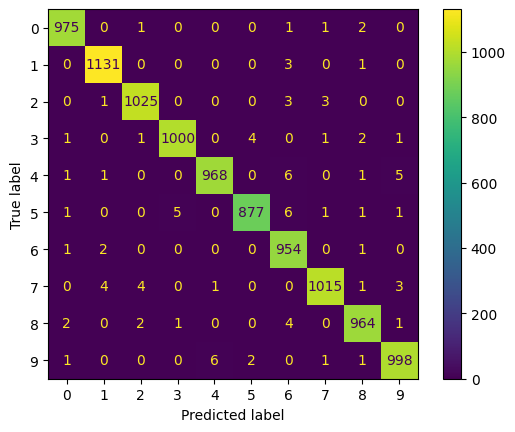

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()